In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

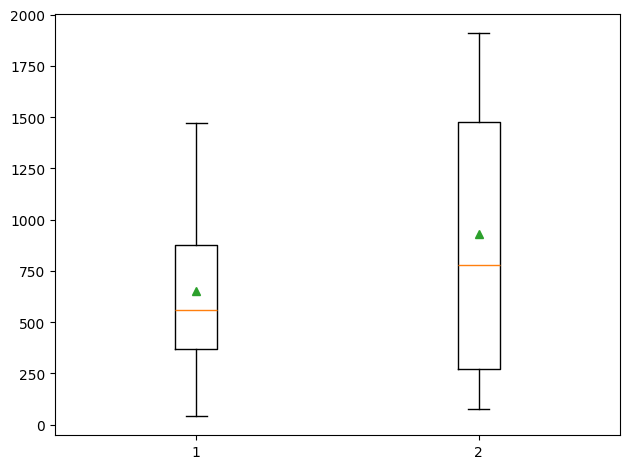

In [14]:
# Box Plot

# kai norima matyti kaip issibarste duomenys, kaip pasiskirste vidurkis, mediana. Pvz patikrinti techninio sprendimo naudinguma

a = np.random.randint(10,1500,25)
b = np.random.rand(25)
c = np.random.randint(5,2000,25)
d = c*b

fig, axis = plt.subplots()
#plotting code:
axis.boxplot(a,showmeans=True) # a parodo grafika, showmeans parodo vidurki
axis.boxplot(c,showmeans=True, positions=[2]) # postions atskiria rezultatus viena nuo kito, pozicija 2 pastumia i sali

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

# oranzinis bruksnelis yra mediana
# zalias trikampiukas- vidurkis

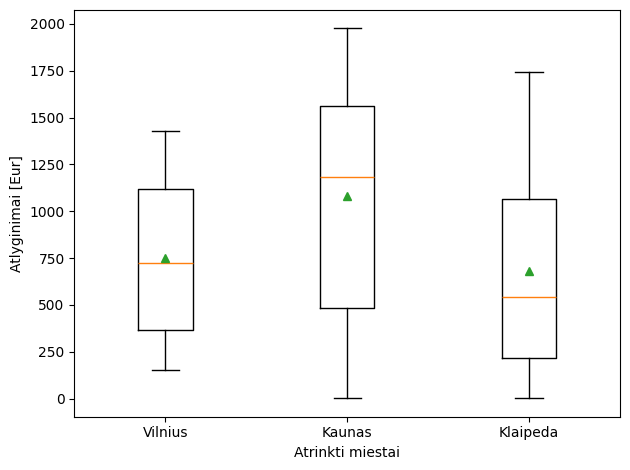

In [22]:
a = np.random.randint(10,1500,25)
b = np.random.rand(25)
c = np.random.randint(5,2000,25)
d = c*b

data=[a,c,d] # sarasas skaiciu sarasu/numpy masyvu, kad nereiktu rankomis kiekvienam sarasui rasyti po atskira eilute
fig, axis = plt.subplots()
#plotting code:
axis.boxplot(data,showmeans=True) # boxplotas pats prastumdo visus grafikus

axis.set_ylabel('Atlyginimai [Eur]')
axis.set_xlabel('Atrinkti miestai')
axis.set_xticklabels(['Vilnius', 'Kaunas', 'Klaipeda']) # uzdeda pavadinimus vaizduojamiems grafikams, surasomas pavadinimu sarasas

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

# burbuliukai tai ekstremumai

In [27]:
# Nuskaitykite life-exp.csv;
# gov-forms.csv
# ir sujunkite šias dvi lenteles į vieną naują lentelę.

life_exp = pd.read_csv('life-exp.csv')
life_exp.head(15)

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1955,29.854000
1,Africa,NaN,1955,38.783000
2,Albania,ALB,1955,57.007000
3,Algeria,DZA,1955,43.916000
4,American Samoa,ASM,1955,64.985000
5,Americas,NaN,1955,60.959636
6,Andorra,AND,1955,66.111000
7,Angola,AGO,1955,36.315000
8,Anguilla,AIA,1955,57.476000
9,Antigua and Barbuda,ATG,1955,58.946000


In [28]:
gov_forms = pd.read_csv('gov-forms.csv')
gov_forms.head(15)

,Name,Constitutional form,Head of state,Basis of executive legitimacy
0,Afghanistan,Republic,Executive,Presidency is independent of legislature
1,Albania,Republic,Ceremonial,Ministry is subject to parliamentary confidence
2,Algeria,Republic,Executive,Presidency independent of legislature; ministr...
3,Andorra,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence
4,Angola,Republic,Executive,Presidency is independent of legislature
5,Antigua and Barbuda,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence
6,Argentina,Republic,Executive,Presidency is independent of legislature
7,Armenia,Republic,Ceremonial,Ministry is subject to parliamentary confidence
8,Australia,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence
9,Austria,Republic,Ceremonial,Ministry is subject to parliamentary confidence


In [144]:
govsWithLifeExp = pd.merge(left=life_exp, right=gov_forms, left_on='Entity', right_on='Name', how='inner')
govsWithLifeExp.head(10)

,Entity,Code,Year,Life expectancy,Name,Constitutional form,Head of state,Basis of executive legitimacy
0,Afghanistan,AFG,1955,29.854,Afghanistan,Republic,Executive,Presidency is independent of legislature
1,Albania,ALB,1955,57.007,Albania,Republic,Ceremonial,Ministry is subject to parliamentary confidence
2,Algeria,DZA,1955,43.916,Algeria,Republic,Executive,Presidency independent of legislature; ministr...
3,Andorra,AND,1955,66.111,Andorra,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence
4,Angola,AGO,1955,36.315,Angola,Republic,Executive,Presidency is independent of legislature
5,Antigua and Barbuda,ATG,1955,58.946,Antigua and Barbuda,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence
6,Argentina,ARG,1955,63.773,Argentina,Republic,Executive,Presidency is independent of legislature
7,Armenia,ARM,1955,63.865,Armenia,Republic,Ceremonial,Ministry is subject to parliamentary confidence
8,Australia,AUS,1955,69.998,Australia,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence
9,Austria,AUT,1955,67.244,Austria,Republic,Ceremonial,Ministry is subject to parliamentary confidence


In [42]:
# Ar yra priklausomybė tarp vidutinės gyvenimo trukmės ir konstitucinės valdymo formos?

gyvenimoTrukmeVSvalstValdymoForma = govsWithLifeExp.groupby(by='Constitutional form')['Life expectancy'].mean().sort_values()
gyvenimoTrukmeVSvalstValdymoForma.head(10)

Constitutional form
Provisional               52.069023
Absolute monarchy         61.081746
Republic                  62.235011
Constitutionalmonarchy    69.221684
Name: Life expectancy, dtype: float64

In [101]:
# gauti analogiska lentele su life expectancy vidurkiu 2019m:

govsWithLifeExp = pd.merge(left=life_exp, right=gov_forms, left_on='Entity', right_on='Name', how='inner')
govsWithLifeExp.head(10)

gyvenimoTrukmeVSvalstValdymoForma2 = govsWithLifeExp.query('Year == 2019')[['Year', 'Constitutional form', 'Life expectancy']].groupby(by=['Constitutional form']).mean()
gyvenimoTrukmeVSvalstValdymoForma2

,Year,Life expectancy
Constitutional form,,
Absolute monarchy,2019.0,72.262000
Constitutionalmonarchy,2019.0,77.183368
Provisional,2019.0,64.171333
Republic,2019.0,71.958209


In [139]:
# Suraskite 3kias valstybes, kuriose 2019 metais buvo trumpiausia gyvenimo trukmė.
# bei 3, kuriose buvo ilgiausia. hint: sort_values(by=), tail, head

ilgiausiaGyvTrukme= govsWithLifeExp.query('Year == 2019')[['Year', 'Entity', 'Life expectancy']].sort_values(by='Life expectancy').tail(3)

print('Valstybės, kuriose 2019 metais buvo ilgiausia gyvenimo trukmė:')
ilgiausiaGyvTrukme

Valstybės, kuriose 2019 metais buvo ilgiausia gyvenimo trukmė:


,Year,Entity,Life expectancy
11725,2019,Japan,84.629
11787,2019,San Marino,84.972
11752,2019,Monaco,86.751


In [138]:
trumpiausiaGyvTrukme= govsWithLifeExp.query('Year == 2019')[['Year', 'Entity', 'Life expectancy']].sort_values(by='Life expectancy').head(3)

print('Valstybės, kuriose 2019 metais buvo trumpiausia gyvenimo trukmė:')
trumpiausiaGyvTrukme

Valstybės, kuriose 2019 metais buvo trumpiausia gyvenimo trukmė:


,Year,Entity,Life expectancy
11679,2019,Central African Republic,53.283
11680,2019,Chad,54.239
11735,2019,Lesotho,54.331


In [187]:
# ADVANCED:
# su query() ir for ciklais, .plot() komanda atavizduokite šių atrinktų valstybių
# istorinius gyvenimo
# trukmės duomenis

gyvenimoTrukmeJaponijoje= govsWithLifeExp.query('Entity == "Japan"')[['Year', 'Life expectancy']].sort_values(by='Year')
gyvenimoTrukmeJaponijoje.head()

,Year,Life expectancy
77,1955,64.739
259,1956,65.437
441,1957,66.099
623,1958,66.727
805,1959,67.322


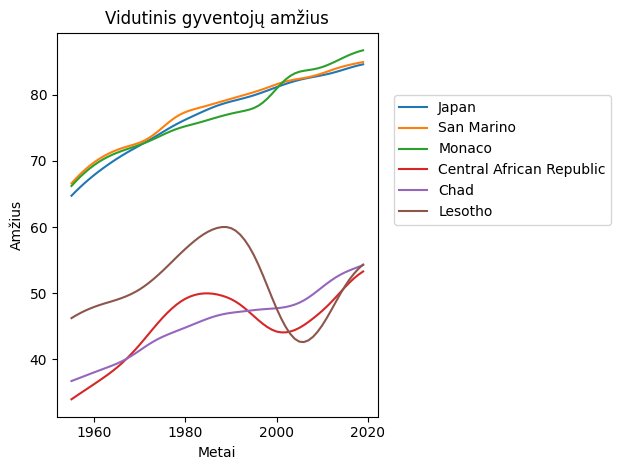

In [221]:
Japonija= govsWithLifeExp.query('Entity == "Japan"')[['Year', 'Life expectancy']].sort_values(by='Year')

ilgiausiaGyvTrukme= govsWithLifeExp.query('Year == 2019')[['Year', 'Entity', 'Life expectancy']].sort_values(by='Life expectancy').tail(3)

trumpiausiaGyvTrukme= govsWithLifeExp.query('Year == 2019')[['Year', 'Entity', 'Life expectancy']].sort_values(by='Life expectancy').head(3)

fig, axis = plt.subplots()

for salis in ilgiausiaGyvTrukme['Entity']:
    vienaSalis = govsWithLifeExp.query('Entity == @salis')[['Year', 'Life expectancy']].sort_values(by='Year') # cikle paimam viena sali is ilgiausiaGyvTrukme ir ieskome metu ir gyvenimo trukmiu is kitos tlenteles- govsWithLifeExp
    axis.plot(vienaSalis['Year'], vienaSalis['Life expectancy'], label = salis) # vienSalis['Year']- x asis, is kokios lenteles koki stulepi imam, vienSalis['Life expectancy']- is kokios lenteles koki stulpeli imam y asiai

for salis in trumpiausiaGyvTrukme['Entity']:
    vienaSalis = govsWithLifeExp.query('Entity == @salis')[['Year', 'Life expectancy']].sort_values(by='Year')
    axis.plot(vienaSalis['Year'], vienaSalis['Life expectancy'], label = salis)

axis.set_xlabel("Metai")
axis.set_ylabel("Amžius")
axis.set_title("Vidutinis gyventojų amžius")

axis.legend(loc=[1.05,0.5])
fig.tight_layout()
plt.show()


In [230]:
# Nuskaitykite auto.csv failą.
# Suraskite 5-kis automobilių gamintojus, kurių gaminamų automobilių
# vidutinė kaina yra didžiausia.
# tada suraskite 5-kis gamintojus, kurių parduodamų automobilių vidutinis
# amžius yra didžiausias.

auto = pd.read_csv('auto.csv', sep='|')
auto.head()

auto_mini = auto[['gamintojas', 'price', 'pagaminimo_data']]
auto_mini

,gamintojas,price,pagaminimo_data
0,BMW,19 500,2005-12
1,Mitsubishi,2 700,2006
2,Seat,13 490,2019-11
3,Skoda,14 650,2015-06
4,Volvo,38 000,2018-08
...,...,...,...
2395,Volvo,2 250,2006-06
2396,Opel,2 250,2006-10
2397,Volkswagen,2 250,2007-06
2398,Audi,2 250,2006-10


In [278]:
# Suraskite 5-kis automobilių gamintojus, kurių gaminamų automobilių
# vidutinė kaina yra didžiausia.

def autoKaina(eurai):
    be_tarpu = float(eurai.replace(" ", ""))
    return be_tarpu

auto_mini['Kaina_Eur']=auto_mini['price'].apply(autoKaina)
auto_mini.sort_values(by='Kaina_Eur').tail(10)

C:\Users\Dovydaiciai\AppData\Local\Temp\ipykernel_18536\2275713341.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_mini['Kaina_Eur']=auto_mini['price'].apply(autoKaina)


,gamintojas,price,pagaminimo_data,Kaina_Eur
219,BMW,96 499,2020-05,96499.0
1045,Mercedes-Benz,100 000,2020,100000.0
72,Mercedes-Benz,100 000,2020,100000.0
2243,Mercedes-Benz,108 000,2020-08,108000.0
220,Mercedes-Benz,111 000,2020-07,111000.0
1195,Mercedes-Benz,111 000,2020-07,111000.0
2244,BMW,122 900,2021-06,122900.0
2245,Aston Martin,125 000,2015-10,125000.0
221,Porsche,145 000,2020-01,145000.0
1196,Porsche,145 000,2020-01,145000.0


In [296]:
# didziausiaKaina.keys()??? kaip su siuo isrinkti unikalius didiausios kainos automobiliu gamintojus

didziausiaVidutineKaina = auto_mini[['gamintojas', 'pagaminimo_data', 'Kaina_Eur']].groupby(by='gamintojas').mean(numeric_only=True).sort_values(by='Kaina_Eur')
didziausiaVidutineKaina.tail(5)

,Kaina_Eur
gamintojas,
Maserati,34950.000000
Land Rover,40925.000000
Tesla,45666.666667
Porsche,61999.900000
Aston Martin,125000.000000


In [ ]:
#Ar galima pasikurti atskira stulpeli su data ja isparsinus

nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_TIME']) # isparsinu data ir laika
nypd['HR']= nypd['OCCUR_TIME'].dt.round('H').dt.hour
nypd.head(3)

In [282]:
# tada suraskite 5-kis gamintojus, kurių parduodamų automobilių vidutinis
# amžius yra didžiausias.

def autoAmzius(metai):
    vien_metai = int(metai[:4])
    return vien_metai

auto_mini['Data']=auto_mini['pagaminimo_data'].apply(autoAmzius)
auto_mini.tail(10)

C:\Users\Dovydaiciai\AppData\Local\Temp\ipykernel_18536\438930700.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_mini['Data']=auto_mini['pagaminimo_data'].apply(autoAmzius)


,gamintojas,price,pagaminimo_data,Kaina_Eur,Data
2390,Opel,2 200,2006,2200.0,2006
2391,Opel,2 200,2008-04,2200.0,2008
2392,Toyota,2 200,2004-12,2200.0,2004
2393,Toyota,2 200,2005-08,2200.0,2005
2394,Volkswagen,2 200,2007-12,2200.0,2007
2395,Volvo,2 250,2006-06,2250.0,2006
2396,Opel,2 250,2006-10,2250.0,2006
2397,Volkswagen,2 250,2007-06,2250.0,2007
2398,Audi,2 250,2006-10,2250.0,2006
2399,Volkswagen,2 250,2005-10,2250.0,2005


In [298]:
didziausiasVidAmzius = auto_mini[[]]
didziausiasVidAmzius.tail()

didziausiaVidutineKaina = auto_mini[['gamintojas', 'pagaminimo_data', 'Data']].groupby(by='gamintojas').mean(numeric_only=True).sort_values(by='Data')
didziausiaVidutineKaina.head()

,Data
gamintojas,
GAZ,1965.75
Lincoln,1969.00
Lada,1981.50
Pontiac,1982.50
UAZ,1989.00


In [307]:
# nuskaitykite dus2014 ir dus2018 failus. 
# Suraskite vidutinius atlyginimus pagal išsilavinimo pakopą tiek 2014 tiek 2018 metams.
# Šiuos atlyginimus sudėkite į dataframe'us (reset_index()), juos sujunkite su merge į bedrą naują lentelę,
# pridėkite naują stulpelį, kur būtų apsakičiuotas pokytis tarp 2041 ir 2018 metų, procentais.

dus2014 = pd.read_csv('DUS2014.csv')
dus2014_mini = dus2014[['issilavinimas', 'bdu_metinis']]
dus2014_mini.head()

dus2018 = pd.read_csv('DUS2018.csv')
dus2018_mini = dus2018[['issilavinimas', 'bdu_metinis']]
dus2018_mini.head(10)

,issilavinimas,bdu_metinis
0,G2,2446
1,G2,16491
2,G2,16532
3,G2,16532
4,G2,4814
5,G2,4811
6,G2,1380
7,G2,4800
8,G2,4896
9,G2,4923


In [340]:
# Suraskite vidutinius atlyginimus pagal išsilavinimo pakopą tiek 2014 tiek 2018 metams.

vidAtl2014= dus2014_mini.groupby(by='issilavinimas')['bdu_metinis'].mean(numeric_only=True).sort_values().reset_index()
vidAtl2014.head()

vidAtl2018= dus2018_mini.groupby(by='issilavinimas')['bdu_metinis'].mean(numeric_only=True).sort_values().reset_index()
vidAtl2018.head()

,issilavinimas,bdu_metinis
0,G1,15277.655997
1,G2,19611.250163
2,G3,28032.562029
3,G4,41082.735838


In [338]:
# Šiuos atlyginimus sudėkite į dataframe'us (reset_index()), juos sujunkite su merge į bedrą naują lentelę,
# pridėkite naują stulpelį, kur būtų apsakičiuotas pokytis tarp 2014 ir 2018 metų, procentais.

du2014_ir_du2018 = pd.merge(left=vidAtl2014, right=vidAtl2018, left_on='issilavinimas', right_on='issilavinimas', how='inner')
du2014_ir_du2018

def LTLtoEuro(litas):
    euras = litas/3.4528
    return euras 

du2014_ir_du2018['2014_atl_Eur']= du2014_ir_du2018['bdu_metinis_x'].apply(LTLtoEuro)
du2014_ir_du2018

,issilavinimas,bdu_metinis_x,bdu_metinis_y,2014_atl_Eur
0,G1,15277.655997,5761.129125,4424.715013
1,G2,19611.250163,7323.283227,5679.810636
2,G3,28032.562029,11651.888879,8118.791134
3,G4,41082.735838,14173.339531,11898.382715


In [347]:
du2014_ir_du2018['Atlyginimu_pokytis_%']= 100-(du2014_ir_du2018['2014_atl_Eur']/du2014_ir_du2018['bdu_metinis_y']*100)
du2014_ir_du2018

,issilavinimas,bdu_metinis_x,bdu_metinis_y,2014_atl_Eur,Atlyginimu_pokytis_%
0,G1,15277.655997,5761.129125,4424.715013,23.197087
1,G2,19611.250163,7323.283227,5679.810636,22.441746
2,G3,28032.562029,11651.888879,8118.791134,30.322103
3,G4,41082.735838,14173.339531,11898.382715,16.050958


In [5]:
#suraskite pokytį tarp vidutinių atlyginimų 2014 ir 2018 metams, procentais pagal amžiaus grupe

dus2014 = pd.read_csv('DUS2014.csv')
dus2014_mini_2 = dus2014[['amzius', 'bdu_spalio']]
dus2014_mini_2.head()

dus2018 = pd.read_csv('DUS2018.csv')
dus2018_mini_2 = dus2018[['amzius', 'bdu_spalio']]
dus2018_mini_2.head(10)

,amzius,bdu_spalio
0,40-49,460
1,50-59,1487
2,40-49,1500
3,50-59,1500
4,40-49,400
5,40-49,400
6,14-29,400
7,50-59,400
8,50-59,400
9,30-39,400


In [14]:
# cia reikia parasyti funkcija, kad apjungti pirmas dvi grupes, nes 2018 yra tik viena.

def apjungimas(amzius):
    if amzius == '14-19' or amzius == '20-29':
        return '14-29'
    else:
        return amzius

dus2014_mini_2['amzius2'] = dus2014_mini_2['amzius'].apply(apjungimas)
dus2014_mini_2

# atlyginimu vidurkis

vidAtl2014_2= dus2014_mini_2.groupby(by='amzius2')['bdu_spalio'].mean(numeric_only=True).sort_index().reset_index()
vidAtl2014_2.head(10)

C:\Users\Dovydaiciai\AppData\Local\Temp\ipykernel_17652\3419223580.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dus2014_mini_2['amzius2'] = dus2014_mini_2['amzius'].apply(apjungimas)


,amzius2,bdu_spalio
0,14-29,2069.491756
1,30-39,2748.111104
2,40-49,2419.098697
3,50-59,2302.199750
4,60+,2164.404096


In [16]:
vidAtl2018_2= dus2018_mini_2.groupby(by='amzius')['bdu_spalio'].mean(numeric_only=True).sort_index().reset_index()
vidAtl2018_2.head(10)

,amzius,bdu_spalio
0,14-29,865.563301
1,30-39,1088.955721
2,40-49,980.855429
3,50-59,856.067124
4,60+,784.542386


In [18]:
# sumerginu dvi lenteles

du2014_ir_du2018_2 = pd.merge(left=vidAtl2014_2, right=vidAtl2018_2, left_on='amzius2', right_on='amzius', how='inner')
du2014_ir_du2018_2

# hint: funkcija ir apply metodas

,amzius2,bdu_spalio_x,amzius,bdu_spalio_y
0,14-29,2069.491756,14-29,865.563301
1,30-39,2748.111104,30-39,1088.955721
2,40-49,2419.098697,40-49,980.855429
3,50-59,2302.199750,50-59,856.067124
4,60+,2164.404096,60+,784.542386


In [19]:
# is litu i Eur 2014m atlyginima

du2014_ir_du2018_2['2014_atl_Eur']= du2014_ir_du2018_2['bdu_spalio_x']/3.4528
du2014_ir_du2018_2

,amzius2,bdu_spalio_x,amzius,bdu_spalio_y,2014_atl_Eur
0,14-29,2069.491756,14-29,865.563301,599.366241
1,30-39,2748.111104,30-39,1088.955721,795.907989
2,40-49,2419.098697,40-49,980.855429,700.619410
3,50-59,2302.199750,50-59,856.067124,666.763134
4,60+,2164.404096,60+,784.542386,626.854754


In [20]:
# atlyginimu pokytis tarp 2014 ir 2018m

du2014_ir_du2018_2['Atlyginimu_pokytis_%']= 100-(du2014_ir_du2018_2['2014_atl_Eur']/du2014_ir_du2018_2['bdu_spalio_y']*100)
du2014_ir_du2018_2

,amzius2,bdu_spalio_x,amzius,bdu_spalio_y,2014_atl_Eur,Atlyginimu_pokytis_%
0,14-29,2069.491756,14-29,865.563301,599.366241,30.754199
1,30-39,2748.111104,30-39,1088.955721,795.907989,26.910895
2,40-49,2419.098697,40-49,980.855429,700.619410,28.570573
3,50-59,2302.199750,50-59,856.067124,666.763134,22.113218
4,60+,2164.404096,60+,784.542386,626.854754,20.099313
